<div style="font-size: 28px; font-weight: bold;"> Иследование сервиса "Ненужные вещи" </div>

Пользователи совершают много действий в приложении, в этих данных должны быть инсайты, которые позволят стать лучшим приложением для продажи ненужных вещей.

**Цель исследования** — Нужно разобраться, как ведут себя пользователи сервиса. 
 
**Входные данный**
- `mobile_sourсes.csv` - база данных браузера пользователя
- `mobile_dataset.csv` - информация о событиях или действиях пользователя

**Ход исследования**
<a name="menu"></a>
 1. **[Обзор данных](#1)**
  -  1.1 Мы проведем загрузку и обзор предоставленных данных
 2. **[Предобработка данных](#2)**
  -  2.1 Проверка на дубликаты
  -  2.2 Проверка на пропуски
  -  2.3 Проверка заголовков на нарушения стиля
  -  2.4 Проверка на другие не соответствия
 3. **[Функции для исследования](#8)**
 4. **[Исследовательский анализ данные](#3)**
  -  3.1 Коэффициент удержания пользователей (retention rate)
  -  3.2 Время пользователей проведенное в приложении, выделим сессии по тайм-аут пользователя (30 мин.)
  -  3.3 Частота совершения событий
  -  3.4 Конверсия в целевое действие `contacts_show`
 5. **[Сегментирование пользователей](#4)**
  -  4.1 Проведем сегментирование пользовательй на группы
 6. **[Ответы на основные вопросы](#5)**
  -  5.1 Пользователи какой группы склонны часто возвращаться в  мобильное приложение (retention rate)?
  -  5.2 Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?
  -  5.1 Поиск "проблемного места", на каком-то действии сессия часто завершается не доходя до целевого?
 7. **[Проверим гипотезы](#6)**
  -  7.1 Нулевая гипотеза что у пользователей использующих Yandex и Google (retention rate) не отличается, альтернативная отличается.
  -  7.2 Нулевая гипотеза что у пользователей использующих приложение днем конверсия не отличается от проводящим в другое время суток, альтернативная отличается.
 8. **[Вывод](#7)**

<a name="1"></a>
# Обзор данных

## Мы проведем загрузку и обзор предоставленных данных

### Импорт библиотек и загрузка данных

`pandas` - для загрузки и обработки данных мы воспльзуемся библеотекой .

`numpy` - библиотека высокоуровневых математических функций

`scipy` - библиотека математического и числового анализов

`datetime` - библиотека для работой с датой

`re` - модуль для регулярных выражений

`seaborn` - библиотека для создания статистических графиков

`matplotlib.pyplot` - библиотека для работы с графиками

`plotly` - библиотека визуализации данных (для воронкообразных диаграмм)

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from datetime import datetime as dt, timedelta
import re
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def pre_check(df):
    display(df.head(5)) # вывод первых 5 строк
    display('Количество пустых ячеек:', df.isna().sum()) # количество пустых ячеек
    display('Количество дубликатов:', df.duplicated().sum()) # количество абсолютных дубликатов
    df.info() # общая информация

### Загрузим файл из папки /datasets и сохраним в переменную

Загрузим файлы для проекта:

In [3]:
pth_ms = 'mobile_soures.csv'# кто-то предоставил "скисшую" базу
pth_md = 'mobile_dataset.csv'
try:
    ms = pd.read_csv(pth_ms)
    md = pd.read_csv(pth_md)
    display('Загрузка онлайн')
except FileNotFoundError:
    display('FileNotFoundError')

'Загрузка онлайн'

<a name="2"></a>
# Предобработка данных
[ссылка в содержание](#menu)

## Проверка на дубликаты и на пропуски

In [4]:
pre_check(ms)

userId  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

'Количество пустых ячеек:'

userId    0
source    0
dtype: int64

'Количество дубликатов:'

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB


В `mobile_soures` очевидных дубликатов нет, пустых ячеек тоже нет.

Есть нарушения стиля в заголовках, прежде чем править их посмотрим как обстоят дела со второй базой:

In [5]:
pre_check(md)

event.time   event.name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user.id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

'Количество пустых ячеек:'

event.time    0
event.name    0
user.id       0
dtype: int64

'Количество дубликатов:'

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74197 entries, 0 to 74196
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   event.time  74197 non-null  object
 1   event.name  74197 non-null  object
 2   user.id     74197 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


В `mobile_dataset` тоже нет очевидных дубликатов и пустых ячеек, но тоже есть нарушения стиля в заголовках.

Поправим заголовки: 

## Проверка заголовков на нарушения стиля

In [6]:
md = md.rename(columns=lambda x: re.sub(r'(\.)', '_', x , 0)) #меняем точку на нижнее подчеркивание
ms = ms.rename(columns=lambda x: re.sub( '(?<!^)(?=[A-Z])', '_', x).lower()) #перед большой буквой ставим нижнее подчеркивание
#и приводим к нижнему регистру
display(md.head())
ms.head()

event_time   event_name  \
0  2019-10-07 00:00:00.431357  advert_open   
1  2019-10-07 00:00:01.236320    tips_show   
2  2019-10-07 00:00:02.245341    tips_show   
3  2019-10-07 00:00:07.039334    tips_show   
4  2019-10-07 00:00:56.319813  advert_open   

                                user_id  
0  020292ab-89bc-4156-9acf-68bc2783f894  
1  020292ab-89bc-4156-9acf-68bc2783f894  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  
3  020292ab-89bc-4156-9acf-68bc2783f894  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c

user_id  source
0  020292ab-89bc-4156-9acf-68bc2783f894   other
1  cf7eda61-9349-469f-ac27-e5b6f5ec475c  yandex
2  8c356c42-3ba9-4cb6-80b8-3f868d0192c3  yandex
3  d9b06b47-0f36-419b-bbb0-3533e582a6cb   other
4  f32e1e2a-3027-4693-b793-b7b3ff274439  google

Заголовки поправленны, идем дальше.

## Проверка на другие не соответствия

Отлично, приведем дату и время к правильному формату:

In [7]:
# преобразуем данные в формат даты и время
md['event_time'] = pd.to_datetime(md['event_time'], format='%Y-%m-%dT%H:%M:%S')

# добавим день и неделю в таблицу
md['event_dt'] = pd.to_datetime(md['event_time']).dt.date
md['week_number'] = md['event_time'].dt.isocalendar().week

md.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id    event_dt  week_number  
0  020292ab-89bc-4156-9acf-68bc2783f894  2019-10-07           41  
1  020292ab-89bc-4156-9acf-68bc2783f894  2019-10-07           41  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  2019-10-07           41  
3  020292ab-89bc-4156-9acf-68bc2783f894  2019-10-07           41  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  2019-10-07           41

Посмотрим за какое время у нам предоставлена база `mobile_dataset`

In [8]:
print(md['event_time'].min())
print(md['event_time'].max())

2019-10-07 00:00:00.431357
2019-11-03 23:58:12.532487


С понедельника 7 октября 2019 года по воскресенье 3 ноября 2019 года (с 00:00 по 23:58)
То есть временной срез за 4 недели.

Посмотрим на пересечения в базах по id пользователей:

In [9]:
not_defined_user = (set(md.user_id) - set(ms.user_id))

print('Пользователи без `source`:', len(not_defined_user))

Пользователи без `source`: 0


Посмотрим на события в базе:

In [10]:
events = md['event_name'].value_counts().reset_index()
events['ratio'] = round(events['event_name']/md.shape[0]*100)

events

index  event_name  ratio
0       tips_show       40055   54.0
1     photos_show       10012   13.0
2     advert_open        6164    8.0
3   contacts_show        4450    6.0
4             map        3881    5.0
5        search_1        3506    5.0
6   favorites_add        1417    2.0
7        search_5        1049    1.0
8      tips_click         814    1.0
9        search_4         701    1.0
10  contacts_call         541    1.0
11       search_3         522    1.0
12       search_6         460    1.0
13       search_2         324    0.0
14       search_7         222    0.0
15  show_contacts          79    0.0

Взгляд на события по количеству их в базе:

показ подсказки</br>
показ фотографии</br>
открыть объявление</br>
контакты показать</br>
карта</br>
поиск 1</br>
избранное добавить</br>
поиск 5</br>
клик по подсказке</br>
поиск 4</br>
вызов контакта</br>
поиск 3</br>
поиск 6</br>
поиск 2</br>
поиск 7</br>
показ контакты</br>


- 1) события `contacts_show`(4450) и `show_contacts`(79) подозрительно похожи, только один значительно меньше.
- 2) много событий поиска `search` 1-7.
- 3.1) очень много происходит показ подсказки `tips_show` - возможно запуск приложения начинается с подсказки.
- 3.2) почему большая разница между кликом по подсказке` tips_click`(814)  и показом подсказки `tips_show`(40055)

Посмотрим чуть подробнее событие просмотр контактов:

In [11]:
md.query('event_name == "contacts_show"').sort_values('event_time').head()

event_time     event_name  \
24  2019-10-07 00:05:16.003328  contacts_show   
70  2019-10-07 00:18:53.427525  contacts_show   
195 2019-10-07 08:11:07.995945  contacts_show   
244 2019-10-07 09:33:19.822541  contacts_show   
327 2019-10-07 10:19:49.080484  contacts_show   

                                  user_id    event_dt  week_number  
24   8c356c42-3ba9-4cb6-80b8-3f868d0192c3  2019-10-07           41  
70   8c356c42-3ba9-4cb6-80b8-3f868d0192c3  2019-10-07           41  
195  48e614d6-fe03-40f7-bf9e-4c4f61c19f64  2019-10-07           41  
244  9dfa242e-8630-480a-806b-5736bcda8f3d  2019-10-07           41  
327  1a3361d1-2002-4389-a669-ecb06ea7a90a  2019-10-07           41

In [12]:
md.query('event_name == "show_contacts"').sort_values('event_time').head()

event_time     event_name  \
4257  2019-10-08 16:49:05.946679  show_contacts   
26536 2019-10-17 21:25:49.022820  show_contacts   
28590 2019-10-18 16:24:24.228978  show_contacts   
49810 2019-10-26 14:00:04.851059  show_contacts   
64828 2019-10-31 12:07:38.629696  show_contacts   

                                    user_id    event_dt  week_number  
4257   e0d5e097-f7c3-4a93-8488-e5b6f1a61d15  2019-10-08           41  
26536  df0abe1d-a5f3-4013-b588-6f015d431197  2019-10-17           42  
28590  df0abe1d-a5f3-4013-b588-6f015d431197  2019-10-18           42  
49810  0f579ce9-7646-430a-91de-1d6d93e2a4d2  2019-10-26           43  
64828  f8502cbc-9322-46eb-bc9f-8f261a94c1a2  2019-10-31           44

Такие события есть и у разных каналов и нет четкой границе по времени чтобы разделить их на смену названия, и это есть у разных пользователей.

Объеденим их так как нет причин разделять их на разное события.

Какая то ошибка привела разным именам события нужно написать разработчикам чтобы посмотрели как записываются или выгружаются данные.

In [13]:
md.loc[md['event_name']=='show_contacts', 'event_name'] = 'contacts_show'
md.head()

event_time   event_name  \
0 2019-10-07 00:00:00.431357  advert_open   
1 2019-10-07 00:00:01.236320    tips_show   
2 2019-10-07 00:00:02.245341    tips_show   
3 2019-10-07 00:00:07.039334    tips_show   
4 2019-10-07 00:00:56.319813  advert_open   

                                user_id    event_dt  week_number  
0  020292ab-89bc-4156-9acf-68bc2783f894  2019-10-07           41  
1  020292ab-89bc-4156-9acf-68bc2783f894  2019-10-07           41  
2  cf7eda61-9349-469f-ac27-e5b6f5ec475c  2019-10-07           41  
3  020292ab-89bc-4156-9acf-68bc2783f894  2019-10-07           41  
4  cf7eda61-9349-469f-ac27-e5b6f5ec475c  2019-10-07           41

проверим нашу замену:

In [14]:
md.query('event_name == "show_contacts"').shape[0]

0

хорошо

перейдем событию поиска, 

- возможно это поиски пользователей за одну сессию
- возможно это номер поиска за день у пользователя

Проверим выделив уникальные id "search_7" и проверим были ли предыдущие поиски и как они распределены.

In [15]:
user_id_s7 = md.query('event_name == "search_7"').sort_values('event_time')['user_id'].unique()#пользователи с событием поиск 7
df_s7 = md.query('user_id in @user_id_s7').sort_values(['event_time','event_name'])#фильтруем по нашим пользователям и сортируем
df_s7['diff'] = md['event_time'].diff() #разница между событиями
df_s7

event_time     event_name  \
399   2019-10-07 11:03:58.321579       search_6   
400   2019-10-07 11:03:59.388629       search_5   
436   2019-10-07 11:11:46.303208       search_7   
437   2019-10-07 11:11:47.853231       search_5   
441   2019-10-07 11:12:14.981106      tips_show   
...                          ...            ...   
74035 2019-11-03 22:43:05.044661  contacts_show   
74043 2019-11-03 22:46:25.214291  contacts_show   
74145 2019-11-03 23:25:26.942460  contacts_show   
74148 2019-11-03 23:29:07.391682  contacts_show   
74156 2019-11-03 23:37:32.236349  contacts_show   

                                    user_id    event_dt  week_number  \
399    1df586e9-5be6-4b10-9316-a6f5d4fb317d  2019-10-07           41   
400    1df586e9-5be6-4b10-9316-a6f5d4fb317d  2019-10-07           41   
436    1df586e9-5be6-4b10-9316-a6f5d4fb317d  2019-10-07           41   
437    1df586e9-5be6-4b10-9316-a6f5d4fb317d  2019-10-07           41   
441    1df586e9-5be6-4b10-9316-a6f5d4fb317d  2019-10-07           41   
...                                     ...         ...          ...   
74035  ec70be94-3ea7-4ac2-90fb-da1a044d7e30  2019-11-03           44   
74043  ec70be94-3ea7-4ac2-90fb-da1a044d7e30  2019-11-03           44   
74145  ec70be94-3ea7-4ac2-90fb-da1a044d7e30  2019-11-03           44   
74148  ec70be94-3ea7-4ac2-90fb-da1a044d7e30  2019-11-03           44   
74156  ec70be94-3ea7-4ac2-90fb-da1a044d7e30  2019-11-03           44   

                        diff  
399   0 days 00:01:12.484329  
400   0 days 00:00:01.067050  
436   0 days 00:00:00.337942  
437   0 days 00:00:01.550023  
441   0 days 00:00:05.180798  
...                      ...  
74035 0 days 00:01:13.966181  
74043 0 days 00:00:38.473829  
74145 0 days 00:00:31.309764  
74148 0 days 00:00:55.935821  
74156 0 days 00:02:21.184976  

[3418 rows x 6 columns]

Видим что поиски идут беспорядочно, `search_6` через секунду `search_5` по через 7,5 минут `search_7` затем опять `search_5` все это у одного пользователя. Какая то ошибка привела к нумерации события нужно написать чтобы разработчикам чтобы посмотрели записываются или выгружаются данные.

вторую гипотезу не будем расматривать так она так же не допустима,
переменуем все события поиска как `search`.

In [16]:
md['event_name'] = md['event_name'].map(
    lambda x: re.sub(r"\_\d", '', x, 0)
)

md['event_name'].value_counts()

tips_show        40055
photos_show      10012
search            6784
advert_open       6164
contacts_show     4529
map               3881
favorites_add     1417
tips_click         814
contacts_call      541
Name: event_name, dtype: int64

Переходим дальше, проверим какое первое события происходит у пользователей(проверим возможно запуск приложения начинается с подсказки`tips_show):

In [17]:
first_event = md.groupby('user_id').agg({'event_name':'first'}).reset_index()
first_events = first_event['event_name'].value_counts().reset_index()
first_events['ratio'] = round(first_events['event_name']/first_event.shape[0]*100)
first_events

index  event_name  ratio
0      tips_show        1398   33.0
1         search        1160   27.0
2            map         807   19.0
3    photos_show         560   13.0
4  contacts_show         179    4.0
5    advert_open         127    3.0
6  favorites_add          49    1.0
7     tips_click          13    0.0

33 % первых событий у пользователей это показ подсказки `tips_show`, трудно сказать первый ли это запуск у самих пользователей или приложение запускается с экрана подсказки.

Так же не стоит отбрасывать что пользователям приходится постоянно обращатся к справке так как интуитивно не понятно где и что находится в приложении.

В любом случае нужно указать на это разработчикам.

Так же смущает разница кол-ва события "нажатие на справку"(**1%**) и ее "показ"(**54% от всех событий**)

Так же не стоит отметать какую то ошибку при отчете, события не было но в отчете оно отобразилась. Или пользователи действительно ее видят, нужно узнать у команды поддержки приложения есть ли какие-то жалобы в этой связи.

Посмотрим какое у нас кол-во уникальных пользователей и как они распределены по источникам:

In [18]:
df = md.merge(ms,on='user_id', how='left')
s1 = df.query('source == "google"').user_id.unique()
s2 = df.query('source == "yandex"').user_id.unique()
s3 = df.query('source == "other"').user_id.unique()

print('Кол-во уникальных пользователей:', len(df.user_id.unique()))

print('Пользователей google:', len(s1))
print('Пользователей yandex:', len(s2))
print('Пользователей other:', len(s3))

Кол-во уникальных пользователей: 4293
Пользователей google: 1129
Пользователей yandex: 1934
Пользователей other: 1230


С предобработкой закончили переходим дальше.

<a name="8"></a>
# Функции для исследовательского анализа 
[ссылка в содержание](#menu)

Напишем функции для для исследовательского анализа:

Функция для подписей на графике

In [19]:
#подпись осей день + понедельник
def mon_ticks(dt_list):
    day_ticks = []
    for i in dt_list:
        if i.strftime('%a') == 'Mon':
            day_ticks.append(i.strftime('%d') + '\n' + i.strftime('%a'))
        else:
            day_ticks.append(i.strftime('%d'))

    return plt.xticks(dt_list, day_ticks)

функция построения графика

In [20]:
def line_plot(df,gr,ct,mt,name,x,y, mon_tiks=True, week_day_text=False):
    
    plot_gr = df.groupby(gr).agg({ct:mt}).reset_index()

    fig = plt.figure(figsize=(17, 6)) # Размер графика

    # Строим график 
    plt.plot(plot_gr[gr], plot_gr[ct])

    plt.title(name)# Заголовок графика
    #  Добавляем подписи к осям:
    plt.xlabel(x)
    plt.ylabel(y)
    
    if mon_tiks:
        mon_ticks(df[gr].sort_values().unique())
    if week_day_text:
        week_list = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
        plt.xticks(df[gr].sort_values().unique(), week_list)

Функция профилей пользователей

In [21]:
def get_profiles(df):
    profiles = (
        df.sort_values(by=['user_id', 'event_time'])
        .groupby('user_id')
        .agg(
            {
                'event_time': 'first',
                'event_dt': 'first',
                'week_number': 'first',
                'event_name': 'first',
                'source': 'first'
            }
            )
        .rename(columns={'event_time': 'first_ts'})
        .reset_index().sort_values(['user_id', 'first_ts'])
    )
    
    return profiles

функция создания таблицы сессии

In [22]:
def sessions(da):
    #групперуем по пользователю и номеру сессии добавляя время начала и конца сессии и названия события первого и последнего.
    session = (
        da
        .pivot_table(index=['user_id','session_id'], values=['event_time','event_name'], aggfunc=['first','last'])
        .reset_index()
    )
    #групперуем по пользователю и номеру сессии считаем общее кол-во событий за сессию и уникальных событий за сессию
    counts_events = (
        da
        .pivot_table(index=['user_id','session_id'], values=['event_name'], aggfunc=['count','nunique'])
        .reset_index()
    )
    #функция удаление двухуровневых названий колонок
    def del_duble_col_name(df1):
        name_col = pd.DataFrame.from_records(df1.columns) #берем двухуровневые названия колонок
        name_col['col'] = name_col[0] + name_col[1].str.replace('event', '_event') #соединяем их в один уровень
        df1.columns = name_col['col'].to_list()#назначаем колонкам один уровень с названиями
        return df1#возвращаем таблицу

    #применяем функцию
    del_duble_col_name(session)
    del_duble_col_name(counts_events)
    #добавляем колонку с датой без времени
    session['dt'] = pd.to_datetime(session['first_event_time']).dt.date
    #добавляем колонку с днем недели
    session['week_day'] = pd.to_datetime(session['first_event_time']).dt.dayofweek
    #добавляем колонку с продолжительностью
    session['duration_m'] = (session['last_event_time'] - session['first_event_time']).astype('timedelta64[m]')
    #добавляем колонку с браузерами
    session = pd.merge(session, ms,on='user_id', how='left')
    #добавляем колонку с кол-вом событий
    session = pd.merge(session, counts_events, on=['user_id','session_id'], how='left')

    return session


Напишем функции `Retention Rate`(кофициент удержания),`filter_data`(сглаживание графика) и `plot_retention`(визуализация удержания)

In [23]:
def get_retention(
    profiles,
    session,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )

    result_raw = profiles.query('event_dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        session[['user_id', 'first_event_time']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['first_event_time'] - result_raw['first_ts']
    ).dt.days

    # групперуем в зависимости от dimensions и горизонта
    def group_by_dimensions(df, dims, horizon_days):
        if len(dims) != 0:
            result = df.pivot_table(
                index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
            )
            cohort_sizes = (
                df.groupby(dims)
                .agg({'user_id': 'nunique'})
                .rename(columns={'user_id': 'cohort_size'})
            )
            result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
            result = result.div(result['cohort_size'], axis=0)
            result = result[['cohort_size'] + list(range(horizon_days))]
            result['cohort_size'] = cohort_sizes
            return result   
            
        else:
            result = df.pivot_table(
                 columns='lifetime', values='user_id', aggfunc='nunique'
            )
            cohort_sizes = df['user_id'].nunique()
            result['cohort_size'] = cohort_sizes
            result = result.div(result['cohort_size'], axis=0)
            result = result[['cohort_size'] + list(range(horizon_days))]
            result['cohort_size'] = cohort_sizes
            return result 
        

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['event_dt'], horizon_days
        )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [24]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [25]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт и удержание первого дня
    retention = retention_grouped.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[[horizon_days - 1]]
    
    if len(retention.index)==1:
        retention['cohort'] = 'All users'
        retention = retention.set_index(['cohort'])

    # в таблице графиков — две ячейки
    # в первой строим кривые удержания 
    ax1 = plt.subplot(1, 2, 1)
    retention.T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание пользователей')


    # в второй ячейке — динамика удержания 
    ax3 = plt.subplot(1, 2, 2, sharey=ax1)
    
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['event_dt']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.pivot_table(
        index='event_dt',columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей на {}-й день'.format(
            horizon
        )
    )
    plt.tight_layout()
    plt.show()

Напишем функцию конверсии в целевое действие:

In [26]:
def conversion_event(df, index, value, event, columns=[]):
    indexs = []
    indexs.append(index)
    if len(columns) != 0:
        for i in columns:
            indexs.append(i)
    
    unuque_id = df.pivot_table(index=indexs, values=value, aggfunc='nunique').reset_index()
    unuque_id_event = df.query('event_name == @event').pivot_table(index=indexs, values=value, aggfunc='nunique').reset_index()
    unuque_id = unuque_id.merge(unuque_id_event,on=indexs)
    unuque_id = unuque_id.rename(columns={value+'_x':'all_unuque_id',value+'_y':'id_event'})
    unuque_id['ratio'] = round(unuque_id['id_event']/unuque_id['all_unuque_id'],3) #добавляем % от первого события
    if len(columns) != 0:
        unuque_id = unuque_id.pivot_table(index='event_dt', columns=columns)
        return unuque_id
    else:
        unuque_id = unuque_id.pivot_table(index='event_dt')
        return unuque_id

Напишем функцию для формирования воронки действия:

In [27]:
def funnel_through(df, u_id, event_name, date_time, list_events, list_events_text, title, through=False, img=False):
    
    #создаем сводную таблицу
    step_data_pivot = df.pivot_table(index=u_id, #user_id, devaice_id ... _id
                                   columns=event_name, #event_name
                                   values=date_time, #event_date
                                   aggfunc='min')
    
    counts_step = len(list_events)#определяем кол-во шагов
    steps = {}#создаем словарь шагов
    steps[0] = ~step_data_pivot[list_events[0]].isna()#первый шаг воронки проверка на не пустое значение
    if through:
        for i in range(0,len(list_events)-1):#остальные шаги
            steps[i+1] = steps[0] & (~step_data_pivot[list_events[i+1]].isna())
        #проверяем True предыдущего шага и что есть два следущих события True и они идут друг за другом
    else:
        for i in range(0,len(list_events)-1):#остальные шаги
            steps[i+1] = steps[i] & (step_data_pivot[list_events[i+1]] > step_data_pivot[list_events[i]])
        #проверяем True предыдущего шага и что есть два следущих события True и они идут друг за другом
    steps_sum = [sum(steps[x]) for x in steps.keys()]#считаем сумму
    
    df_steps = pd.DataFrame(steps_sum, index=list_events_text, columns=['quantity']) #собираем в таблицу
    df_steps['ratio 100%'] = round(df_steps['quantity']/df_steps['quantity'][0] * 100) #добавляем % от первого события
    df_steps['ratio %'] = (round(df_steps['quantity'].pct_change(),2) + 1) * 100 #добавляем % от предыдущего шага
    display(df_steps) #выводим таблицу можно сделать return если не нужна визуализация
    
    if img:
        #делаем график воронки
        fig = go.Figure(go.Funnel(
        y = df_steps.index,
        x = df_steps['quantity']
        ))
        fig.update_layout(title=title)
        fig.show()

Напишем функцию конверсии одного целевого события от всех уникальных пользователей:

In [28]:
def conversion_one_key_event(df, u_id, event_name, date_time, one_event, one_event_text, title, img=False):
    
    #создаем сводную таблицу
    step_data_pivot = df.pivot_table(index=u_id, #user_id, devaice_id ... _id
                                   columns=event_name, #event_name
                                   values=date_time, #event_date
                                   aggfunc='min')
    
    tab_funnel = {}
    tab_funnel['Всего уникальных пользователей'] = [step_data_pivot.shape[0]]
    tab_funnel[one_event_text] = [sum(~step_data_pivot[one_event].isna())]
    
    tab_funnel = pd.DataFrame(tab_funnel).T
    tab_funnel.columns = ['quantity']
    tab_funnel['ratio 100%'] = round(tab_funnel['quantity']/tab_funnel['quantity'][0] * 100)
    tab_funnel['ratio %'] = (round(tab_funnel['quantity'].pct_change(),2) + 1) * 100
    display(tab_funnel)    
    
    if img:
        fig = go.Figure(go.Funnel(
        y = list(tab_funnel.index),
        x = list(tab_funnel['quantity'])
        ))
        fig.update_layout(title=title)
        fig.show()
    

Напишем функцию для проверки гипотез используя для этого `т-тест`:

In [29]:
   
def t_test(df_1,df_2, alpha, t_df_1, t_df_2,text,m=1):
    alpha = alpha #критический уровень статистической значимости

    results = st.ttest_ind(
        df_1,
        df_2
    )

    print('p-значение:', results.pvalue)

    if results.pvalue < alpha:
        print('Отвергаем нулевую гипотезу, что ' + text)
    else:
        print('Не получилось отвергнуть нулевую гипотезу, что ' + text)
    print() 
    print('cреднее по ' + t_df_1 + ': ', round(df_1.mean()*m,3))
    print('cреднее по ' + t_df_2 + ': ', round(df_2.mean()*m,3))

Функция `z-тест` для пропорций:

In [30]:
def equality_check( t1, t2, s1, s2, alpha):

    successes = np.array([s1, s2])
    trials = np.array([t1, t2])

    # пропорция успехов в первой группе:
    p1 = successes[0]/trials[0]

    # пропорция успехов во второй группе:
    p2 = successes[1]/trials[1]

    # пропорция успехов в комбинированном датасете:
    p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])

    # разница пропорций в датасетах
    difference = p1 - p2 

    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / (p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1])) ** 0.5

    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print(
            'Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными'
        )
        
def cicle_event(df, group1, group2, alpha):
    for i in range(1, len(df[group1])):
        print(group1,'&', group2, df.index[i])
        equality_check(
            df[group1][0],
            df[group2][0],
            df[group1][i],
            df[group2][i],
            alpha)
        print()


<a name="3"></a>
# Исследовательский анализ данные
[ссылка в содержание](#menu)

## Время пользователей проведенное в приложении

Подготовим данные для дальнейшего анализа,

посмотрим сколько проходит времени между событиями у пользователей

In [31]:
# отсортируем таблицу по пользователям и времени:
df = df.sort_values(['user_id', 'event_time'])
# определим длительность между событиями
diff_timestamp = df.groupby('user_id')['event_time'].diff()
# вызовим describe() для понимания какой у нас диапозон, среднее и т.д.:
(diff_timestamp.astype('timedelta64[s]')/60).describe()

count    69904.000000
mean       233.011283
std       1532.954328
min          0.000000
25%          0.383333
50%          1.166667
75%          3.000000
max      38269.900000
Name: event_time, dtype: float64

- 25 % - данных у время между событиями меньше пол-минуты
- median - чуть больше минуты
- 75 % - 3 минуты

среднее 233 минуты, такая разница с медианой говорит что в данных выбросы.

Принято считать что 30 минут простоя за новую сессию, не имея иных вводных мы так же возьмем это за основу:

In [32]:
# создадим переменную 30 минут на простой для определения новой сесии
time_session = np.timedelta64(30,'m')
# размечаем события превышающие пороговое значение
new_session = (diff_timestamp.isnull()) | (diff_timestamp > time_session)
# присвоим номер сессии пользователя в соответствии таблице new_session присвоив ранк и поменяем тип на число
df['session_id'] = df.loc[new_session, ['user_id', 'event_time']].groupby('user_id').rank(method='first').astype(int)
# заполним промежеточные значения Nan на ранк в соответсвии с их порядком до новой сессии
df['session_id'] = df['session_id'].fillna(method='ffill').astype(int)

df.head()

event_time event_name  \
805 2019-10-07 13:39:45.989359  tips_show   
806 2019-10-07 13:40:31.052909  tips_show   
809 2019-10-07 13:41:05.722489  tips_show   
820 2019-10-07 13:43:20.735461  tips_show   
830 2019-10-07 13:45:30.917502  tips_show   

                                  user_id    event_dt  week_number source  \
805  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
806  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
809  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
820  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
830  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   

     session_id  
805           1  
806           1  
809           1  
820           1  
830           1

Хорошо переходим дальше к сессиям пользователей:

In [33]:
session = sessions(df)
session.head()

user_id  session_id first_event_name  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           1        tips_show   
1  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           2              map   
2  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           3        tips_show   
3  0001b1d5-b74a-4cbf-aeb0-7df5947bf349           4              map   
4  00157779-810c-4498-9e05-a1e9e3cedf93           1           search   

            first_event_time last_event_name            last_event_time  \
0 2019-10-07 13:39:45.989359       tips_show 2019-10-07 13:49:41.716617   
1 2019-10-09 18:33:55.577963       tips_show 2019-10-09 18:42:22.963948   
2 2019-10-21 19:52:30.778932       tips_show 2019-10-21 20:07:30.051028   
3 2019-10-22 11:18:14.635436       tips_show 2019-10-22 11:30:52.807203   
4 2019-10-19 21:34:33.849769     photos_show 2019-10-19 21:59:54.637098   

           dt  week_day  duration_m  source  count_event_name  \
0  2019-10-07         0         9.0   other                 9   
1  2019-10-09         2         8.0   other                 4   
2  2019-10-21         0        14.0   other                14   
3  2019-10-22         1        12.0   other                 8   
4  2019-10-19         5        25.0  yandex                 9   

   nunique_event_name  
0                   1  
1                   2  
2                   2  
3                   2  
4                   2

посмотрим сколько у нас сессий с продолжительность 0:

In [34]:
print('Кол-во нулевых сесиий:', session.query('duration_m == 0').shape[0])
print('% нулевых сесиий:', round(session.query('duration_m == 0').shape[0]/session.shape[0]*100))

Кол-во нулевых сесиий: 3072
% нулевых сесиий: 30


почти 1/3 всех сессий

Посмотрим на них подробнее:

In [35]:
session.query('duration_m == 0').head()

user_id  session_id first_event_name  \
9   00157779-810c-4498-9e05-a1e9e3cedf93           6    contacts_show   
15  004690c3-5a84-4bb7-a8af-e0c8f8fca64e           5           search   
17  00551e79-152e-4441-9cf7-565d7eb04090           1    contacts_show   
19  00551e79-152e-4441-9cf7-565d7eb04090           3      photos_show   
26  00753c79-ea81-4456-acd0-a47a23ca2fb9           1    contacts_show   

             first_event_time last_event_name            last_event_time  \
9  2019-11-03 17:12:09.708771   contacts_show 2019-11-03 17:12:09.708771   
15 2019-10-27 20:18:09.004261          search 2019-10-27 20:18:26.910719   
17 2019-10-25 16:44:41.263364   contacts_call 2019-10-25 16:44:44.786860   
19 2019-10-29 02:17:12.342406     photos_show 2019-10-29 02:17:12.342406   
26 2019-10-20 14:57:06.080501   contacts_show 2019-10-20 14:57:06.080501   

            dt  week_day  duration_m  source  count_event_name  \
9   2019-11-03         6         0.0  yandex                 1   
15  2019-10-27         6         0.0  google                 4   
17  2019-10-25         4         0.0  yandex                 2   
19  2019-10-29         1         0.0  yandex                 1   
26  2019-10-20         6         0.0  yandex                 1   

    nunique_event_name  
9                    1  
15                   1  
17                   2  
19                   1  
26                   1

Нельзя сказать что это какой то сбой, так как есть сессии где:
- пользователь посмотрел контакты, **совершил одно событие** и сессия завершилась
- пользователь потратил **меньше 30 секунд** на сессию, успел **4 раза воспользоваться поиском** и сессия завершилась (30 мин простой)
- пользователь посотрел контакты и совершил вызов, **уложившись в 4 секунд**

In [36]:
session.duration_m.describe()

count    10368.000000
mean        12.495177
std         19.782827
min          0.000000
25%          0.000000
50%          5.000000
75%         17.000000
max        321.000000
Name: duration_m, dtype: float64

- максимальная сессия 321 мин
- медиально 5 мин.
- средняя 12,4 мин.(подверженно выбросам)

посмотрим продолжительность 95 и 99%

In [37]:
np.percentile(session.duration_m, [95, 99]) 

array([48., 92.])

99% - не превышает 92 мин.

Выведем график продолжительности сессии:

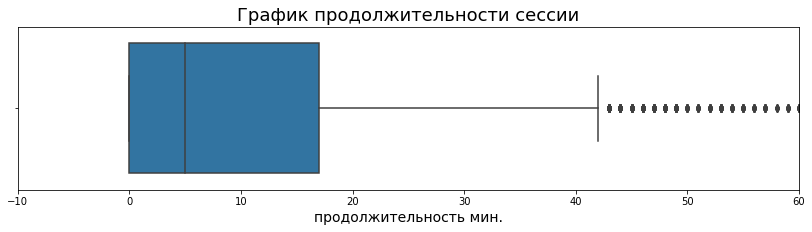

In [38]:
plt.figure(figsize=(14, 3))
ax = sns.boxplot(data=session, x='duration_m', dodge=False);
ax.set_ylabel('', size=14)
ax.set_xlabel('продолжительность мин.', size=14)
plt.title('График продолжительности сессии', size=18)
plt.xlim(-10, 60);

построимграфик продолжительности сессии по дням

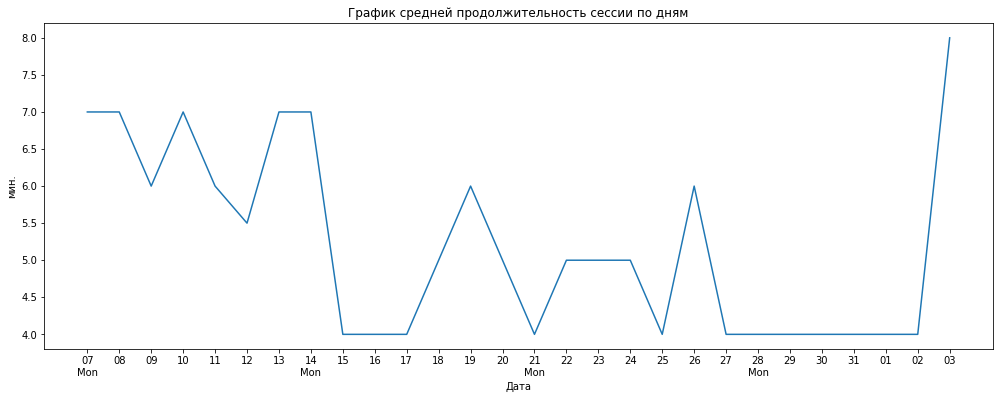

In [39]:
line_plot(
    session,
    'dt',
    'duration_m',
    'median',
    'График средней продолжительность сессии по дням',
    'Дата',
    'мин.'
)

средняя продолжительность сессии очень не стабильная. если рассматривать с 7 октября по 2 ноября то тренд падающий.

- перевая неделя самая высокая продолжительность(она же самая стабильная) в среденем от 5,5 до 7 мин.
- с второй недели резко падает с 7 мин до 4 мин во вторник. скачек в субботу к 6 мин.
- 4 неделя самая низкая около 4 мин стабильно кроме большого скачка в воскресенье 8 мин.
- есть небольшой рост к выходным на каждой недели.

Посмотрим как распределяется среднее время по дням недели:

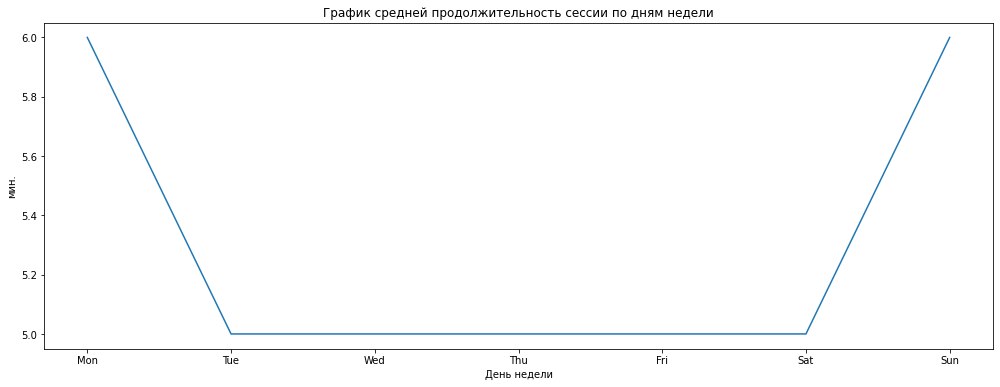

In [40]:
line_plot(
    session,
    'week_day',
    'duration_m',
    'median',
    'График средней продолжительность сессии по дням недели',
    'День недели',
    'мин.',
    mon_tiks = False,
    week_day_text=True
)

Видим что в понедельник и воскресенье(6 минут) пользователи в среднем проводят времени больше чем в другие дни(5 минут).

Посмотрим если сложить все сессии (общее время всех пользователей) за день:

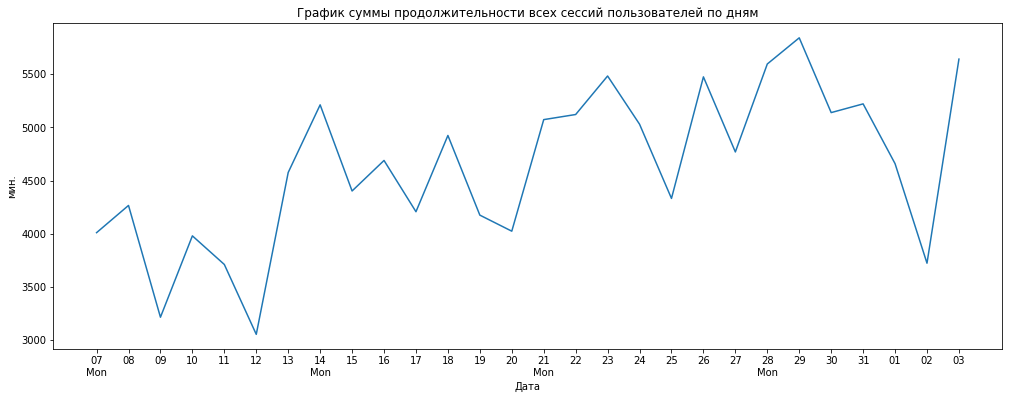

In [41]:
line_plot(
    session,
    'dt',
    'duration_m',
    'sum',
    'График суммы продолжительности всех сессий пользователей по дням',
    'Дата',
    'мин.'
)

Тут наблюдаем тренд на рост общей продолжительности от 3500-4000 мин. 7 октября до 5000-5500 к 28 октябрю и провал к 2 ноября до 3700 мин. 3 ноября возврат к 5500 мин.

- можно сказать что тенденция в целом **положительная**, пользователи проводят больше времени в приложении.(с учетом средней продолжительности скорее всего общий рост времени говорит о росте кол-во пользователей)

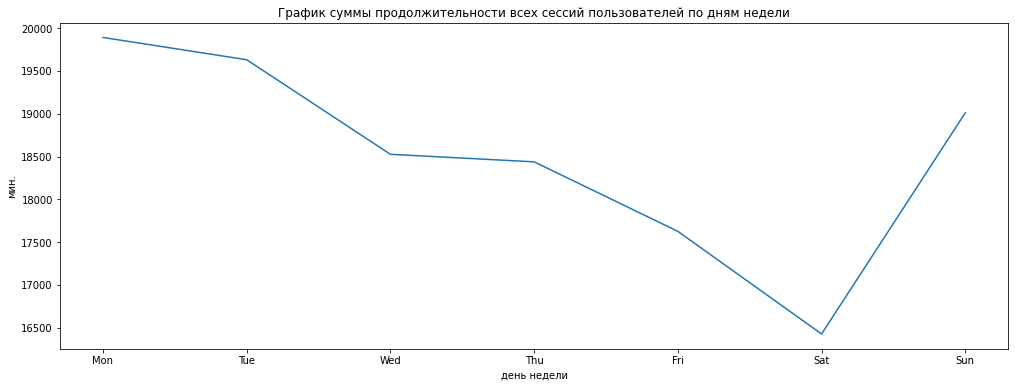

In [42]:
line_plot(
    session,
    'week_day',
    'duration_m',
    'sum',
    'График суммы продолжительности всех сессий пользователей по дням недели',
    'день недели',
    'мин.',
    mon_tiks = False,
    week_day_text=True
)

По дням недели суммарное время распредиляется, **в субботу** самое **низкое значение(16500 мин.)** затем **резкий рост в воскресенье и понедельник (почти 20000 мин.)** и **плавный спуск** опять **к субботе**.

посмотрим на то как менялось кол-во уникальных пользователей:

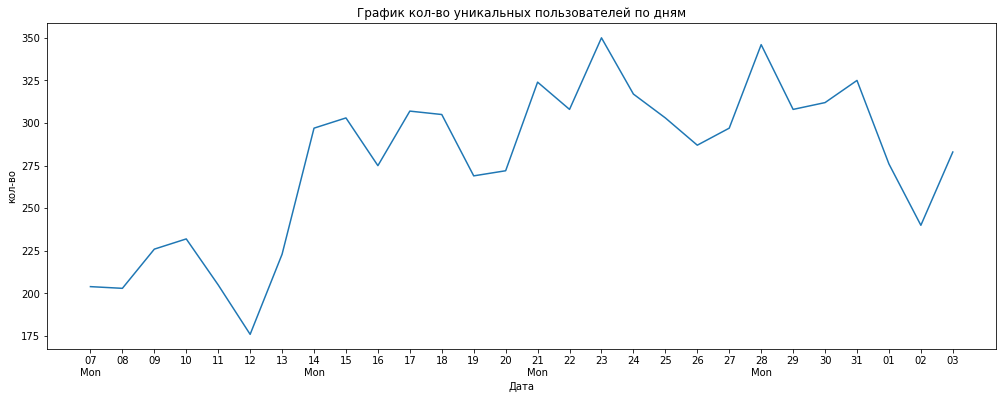

In [43]:
line_plot(
    session,
    'dt',
    'user_id',
    'nunique',
    'График кол-во уникальных пользователей по дням',
    'Дата',
    'кол-во'
)

Да, видим рост аудитории с 175-225 на первой неделе, к 300-350 на третьей неделе и падение к 250-275 к четвертой недели наблюдений. 

Возможно рост связан с празднованием Хеллоуина 31 октября, так как после наблюдаеться спад.

Возможно усиливать рекламу в этот период(и другие некоторые праздники) при которых люди ищут подарки и костюмы к таким праздникам.

Что у нас по дням недели:

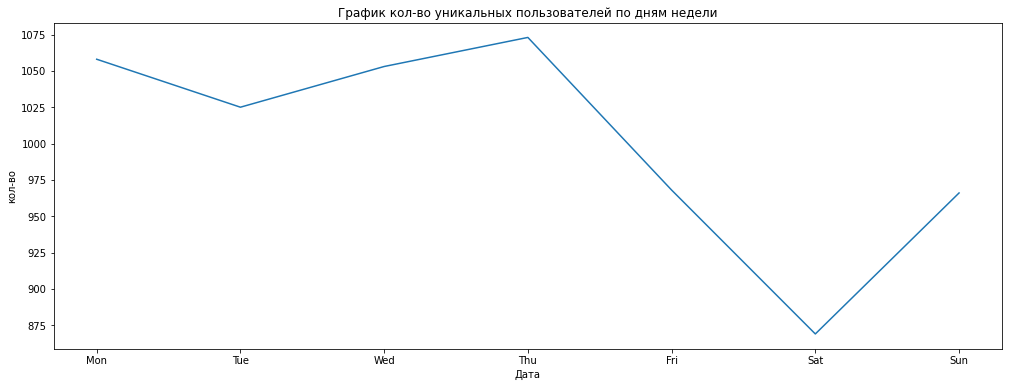

In [44]:
line_plot(
    session,
    'week_day',
    'user_id',
    'nunique',
    'График кол-во уникальных пользователей по дням недели',
    'Дата',
    'кол-во',
    mon_tiks = False,
    week_day_text=True
)

Пик кол-ва пользователей в среда и понедельник 1050-1070 пользователей, провал в субботу около 875.

**все это с учетом небольшого среза данных, всего 4 недели.*

##  Коэффициент удержания пользователей

вызовем нашу функцию для создания профилей пользователей

In [45]:
profiles = get_profiles(df)
print('Всего пользователей:', profiles.shape[0])
profiles.head()

Всего пользователей: 4293


user_id                   first_ts  \
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349 2019-10-07 13:39:45.989359   
1  00157779-810c-4498-9e05-a1e9e3cedf93 2019-10-19 21:34:33.849769   
2  00463033-5717-4bf1-91b4-09183923b9df 2019-11-01 13:54:35.385028   
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e 2019-10-18 22:14:05.555052   
4  00551e79-152e-4441-9cf7-565d7eb04090 2019-10-25 16:44:41.263364   

     event_dt  week_number     event_name  source  
0  2019-10-07           41      tips_show   other  
1  2019-10-19           42         search  yandex  
2  2019-11-01           44    photos_show  yandex  
3  2019-10-18           42         search  google  
4  2019-10-25           43  contacts_show  yandex

Посмотрим общий кофициент удержания за 7 дней:

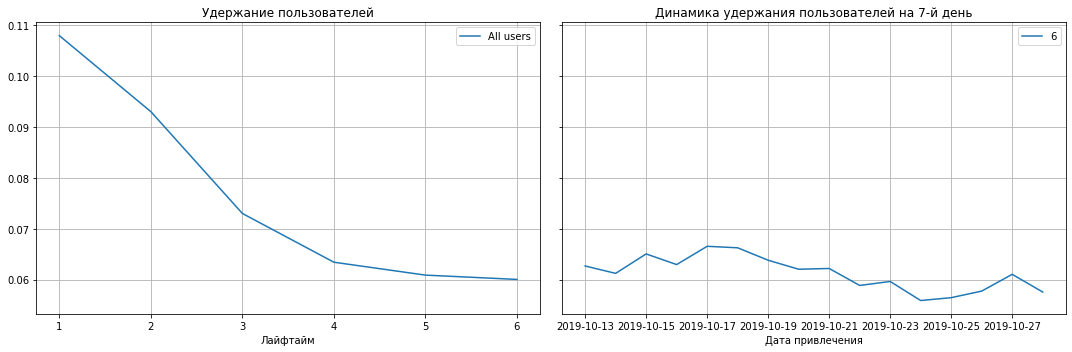

In [46]:
horizon_days = 7
observation_date = md['event_dt'].max()


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, session, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание за 7 дней плавно спускается с 11% до 6%. удержание на 7 день стабильно около 6%.

Посмотрим общий кофициент удержания за 14 дней:

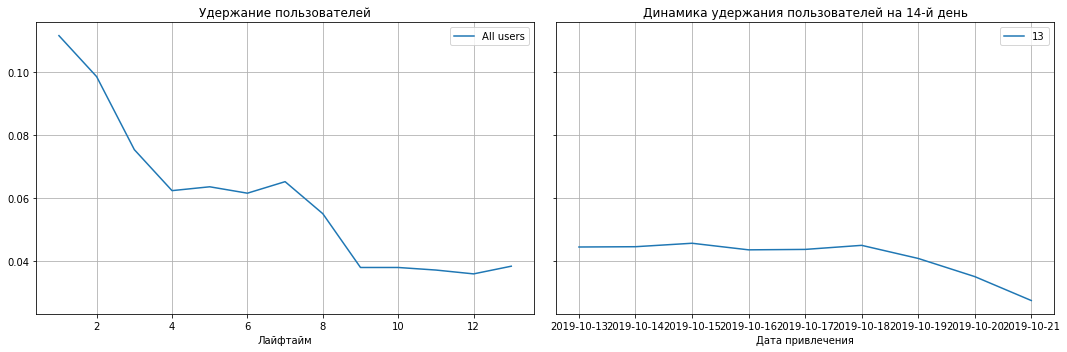

In [47]:
horizon_days = 14

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, session, observation_date, horizon_days
)
plot_retention(retention_grouped, retention_history, horizon_days) 

С увеличением горизонта кофициент продолжает снижаться и останавливается около 4% к 13 дню.

Динамика показывает что c 18 октября начинается снижение с 4% к  в район 2,5%

Посотрим на удержание с разбиением на источники:

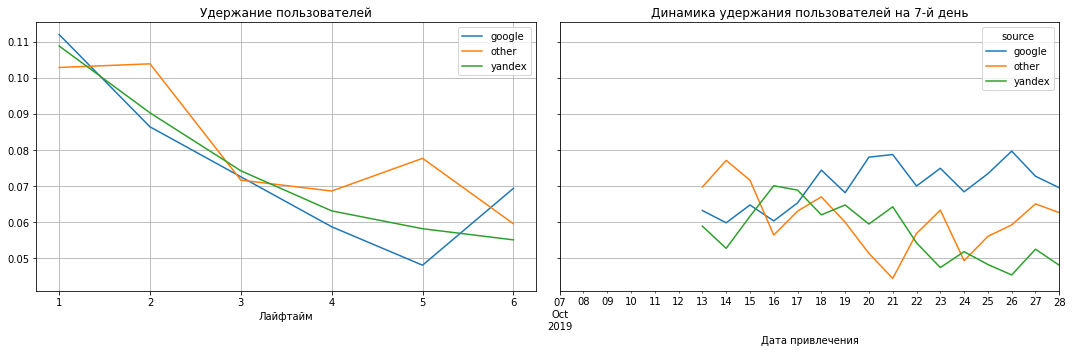

In [48]:
horizon_days = 7
dimensions = ['source']


retention_raw, retention_grouped, retention_history = get_retention(
    profiles, session, observation_date, horizon_days, dimensions=dimensions
)
plot_retention(retention_grouped, retention_history, horizon_days)

Дополнительно посмотрим на хитмэп:

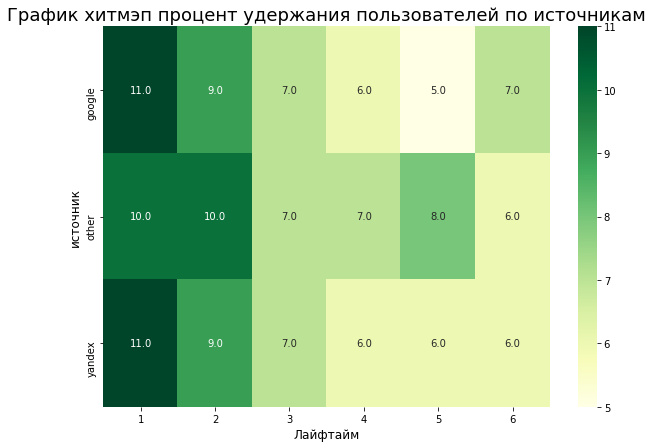

In [49]:
fig = plt.subplots(figsize =(10, 7))
sns.heatmap(round(retention_grouped.drop(columns=['cohort_size', 0])*100), annot=True,cmap='YlGn', fmt='');
plt.title('График хитмэп процент удержания пользователей по источникам', size=18)
plt.xlabel('Лайфтайм', size=12)
plt.ylabel('источник', size=12);

В разрезе деления по источникам за 7 дней можно отметить
- более равномерное снижение `yandex` с 11% до 5.5%
- `other` снижается скачкообразно с 10,5% до 6%
- `google` снижается к 5 дню к 5% а к 6 дню необычный отскок к 7%

По динамике на 7 день можно отметить:
- у `google` наблюдаем небольшой положительный тренд с 6-6,5% до 7-7,5%
- у `yandex` наблюдаем небольшой отрицательный тренд с 6-7% до 4,5-5%
- у `other` наблюдаем небольшой отрицательный тренд с 7-7,7% до 5-6%

## Частота совершения событий

Посмотрим на самые частые события в базе, после нашей предобработки:

In [50]:
events = md['event_name'].value_counts().reset_index()
events['ratio'] = round(events['event_name']/md.shape[0]*100)

Выведим график:

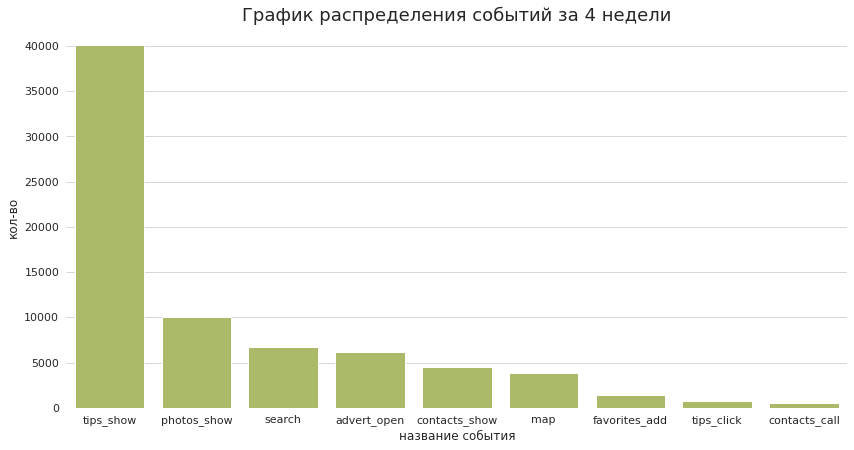

In [51]:
# назначаем стиль графика
sns.set_style('whitegrid')
# назначаем размер графика
plt.figure(figsize=(14, 7))
plt.box(False) #убрать рамку

# строим график
ax = sns.barplot(
    x='index', 
    y='event_name',
    data=events, 
    color ='#b3c75c'
) 

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределения событий за 4 недели', size=18)
plt.xlabel('название события', size=12)
plt.ylabel('кол-во', size=12)
ax.tick_params(labelsize=11)

In [52]:
events = md['event_name'].value_counts().reset_index()
events['ratio'] = round(events['event_name']/md.shape[0]*100)

events

index  event_name  ratio
0      tips_show       40055   54.0
1    photos_show       10012   13.0
2         search        6784    9.0
3    advert_open        6164    8.0
4  contacts_show        4529    6.0
5            map        3881    5.0
6  favorites_add        1417    2.0
7     tips_click         814    1.0
8  contacts_call         541    1.0

- 54% показ подсказки (`tips_show`) - 40055
- 13% показ фото (`photos_show`) - 10012
- 9% поиск (`search`) - 6784
- 8% открытие объявления (`advert_open`) - 6164
- 6% показ контактов (`contacts_show`) - 4529
- 5% карта (`map`) - 3881
- 2% добавление в избранное (`favorites_add`) - 1417
- 1% клик по подсказке (`tips_click`) - 814
- 1% звонок (`contacts_call`) - 541

как и в предварительном анализе смущает огромное кол-во показов посказки более половины(54%) всех событий, и это с учетом что кликов по подсказке всего 1%.

для более детального анализа нам нужно понимать как работает приложение, какие шаги "обязательные" и "не обязательные" и что точно можно считать целевым событием.

так как мы на данный момент не распологаем такими подробностями примем за целевое событие **показ контактов** (`contacts_show`), будем считать что пользователь заинтересовался объявление и намерен позвонить (возможно по телефону минуя само приложение).

Посмотрим как распределены события по датам:

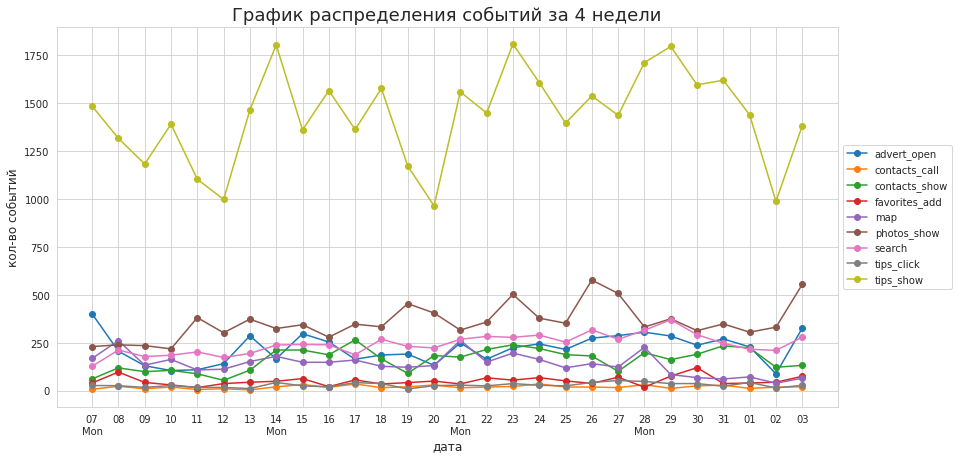

In [53]:
(df
 .pivot_table(index='event_dt', columns='event_name', values='user_id', aggfunc='count')
 .plot(kind='line', figsize=(14,7),  style = 'o-', grid=True)
);

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределения событий за 4 недели', size=18)
plt.xlabel('дата', size=12)
plt.ylabel('кол-во событий', size=12)
ax.tick_params(labelsize=11)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mon_ticks(df['event_dt'].sort_values().unique());

Интересная скачкообразная тенденция `tips_show` в начале каждой недели событие растет к концу снижается.
Из за большого кол-ва "подсказок" трудно различить другие события, посмотрим на график без нее:

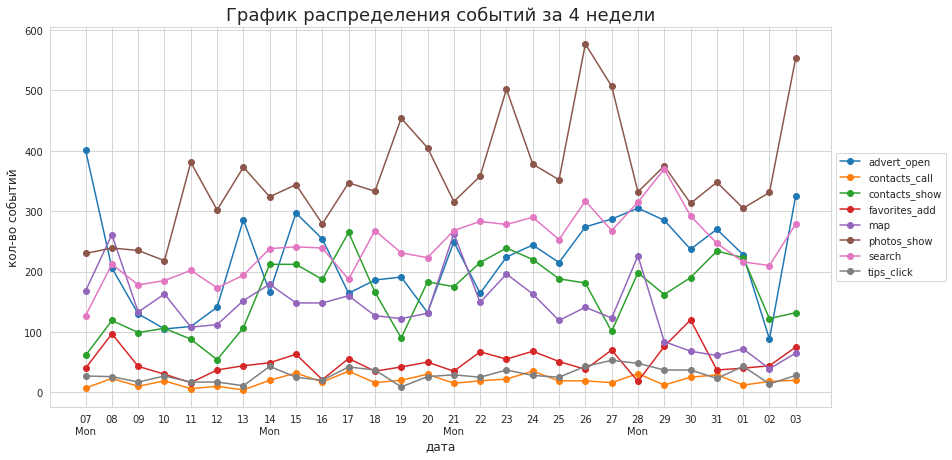

In [54]:
(df.query('event_name !="tips_show"')
 .pivot_table(index='event_dt', columns='event_name', values='user_id', aggfunc='count')
 .plot(kind='line', figsize=(14,7),  style = 'o-', grid=True)
);

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График распределения событий за 4 недели', size=18)
plt.xlabel('дата', size=12)
plt.ylabel('кол-во событий', size=12)
ax.tick_params(labelsize=11)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mon_ticks(df['event_dt'].sort_values().unique());

- можно отметить плавный рост кол-ва события `поиска`(с 130 до 280 с пиком 29 в 380) и `просмотр фото`(с 220 до 550)
- небольшое снижение события `карта` с 400 до 310 с моментами около в средем около 200
- остальные не имеют ярко выроженного тренда.

## Конверсия в целевое действие

Посмотрим общую конверсию:

In [55]:
unique_user = df.user_id.nunique()
unique_user_cs = df.query('event_name =="contacts_show"').user_id.nunique()
print('Всего уникальных пользователей:',unique_user)
print('Всего уникальных пользователей совершивших просмотр контактов:',unique_user_cs)
print('Доля пользователей совершивших просмотр контактов:',round(unique_user_cs/unique_user*100,2),'%')

Всего уникальных пользователей: 4293
Всего уникальных пользователей совершивших просмотр контактов: 981
Доля пользователей совершивших просмотр контактов: 22.85 %


Посмотрим конверсию по источникам:

In [56]:
unique_user_source = df.groupby('source').agg({'user_id':'nunique'})
unique_user_source['target_event'] = df.query('event_name =="contacts_show"').groupby('source').agg({'user_id':'nunique'})
unique_user_source['ratio'] = round(unique_user_source['target_event']/unique_user_source['user_id']*100,1)

unique_user_source.sort_values('ratio', ascending=False)

user_id  target_event  ratio
source                              
yandex     1934           478   24.7
google     1129           275   24.4
other      1230           228   18.5

- лидер по конверсии yandex **25%**, у него же больше аудитория *1934*
- затем google **24.5%**, с *1129* аудиторией
- other всего **18.5%** и *1230* пользователей.

посмотрим на общий график конверсии(+ скользящее среднее 5 дней):

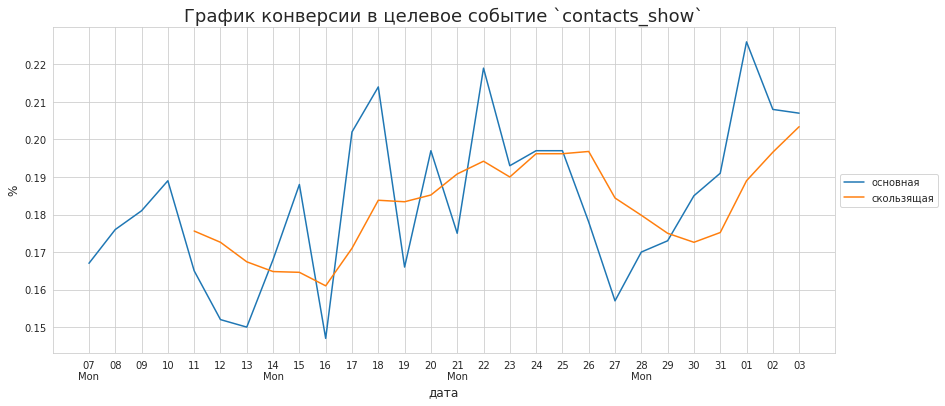

In [57]:
plt.figure( figsize = ( 14, 6))

event_key_contacts_show = conversion_event(df, 'event_dt', 'user_id', 'contacts_show').reset_index()
#скользящее среднее 5 дней
event_key_contacts_show[ 'rolling_avg' ] = event_key_contacts_show.ratio.rolling(5).mean()

sns.lineplot( x = 'event_dt',
             y = 'ratio',
             data = event_key_contacts_show,
             label = 'основная')
  
# plot using rolling average
sns.lineplot( x = 'event_dt',
             y = 'rolling_avg',
             data = event_key_contacts_show,
             label = 'скользящая')

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График конверсии в целевое событие `contacts_show`', size=18)
plt.xlabel('дата', size=12)
plt.ylabel('%', size=12)
ax.tick_params(labelsize=11)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mon_ticks(df['event_dt'].sort_values().unique());

в целом за 4 недели тренд положительный волнообразный(3-4%) от 16,5% до 20,5% 3 ноября,
- с провалами 10-13,16(15%),19,21(17%) и 25-27 октября(16%)
- пиками 18 октября(21,5%), 22 октября(22%),1 ноября(22,5%)

Посмотрим на конверсию от разных источниках

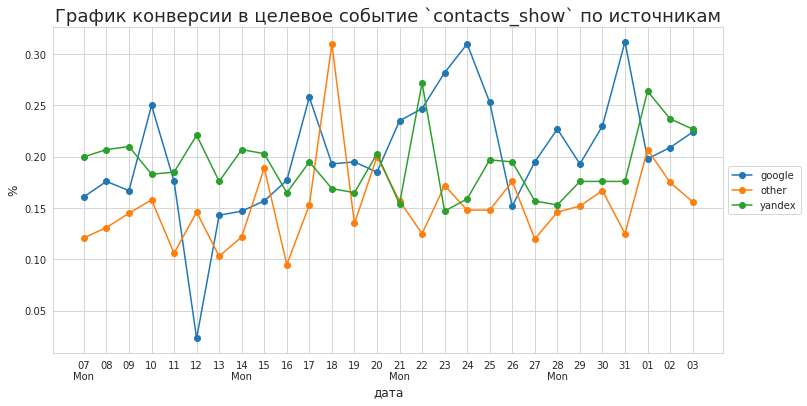

In [58]:
conversion_event(df, 'event_dt', 'user_id', 'contacts_show',
                 columns=['source'])['ratio'].plot(kind='line', figsize=(12,6),  style = 'o-', grid=True)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График конверсии в целевое событие `contacts_show` по источникам', size=18)
plt.xlabel('дата', size=12)
plt.ylabel('%', size=12)
ax.tick_params(labelsize=11)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mon_ticks(df['event_dt'].sort_values().unique())
plt.show()

- у `google` наблюдаем небольшой положительный тренд с 16% до 22% с провалом 12 октября до 2% и пикоми 24 и 31 до 31%
- у `yandex` наблюдаем не выраженный тренд в диапазоне от 15% до 27%, на 3 ноября 22%
- у `other` наблюдаем небольшой положительный тренд с 12% до 15% с пиком 22 октября и 1 ноября до 26%

Посмотрим коверсию целевого события `contacts_show`:

In [59]:
conversion_one_key_event(
    df,
    'user_id',
    'event_name',
    'event_time',
    'contacts_show',
    'Посмотрели контакты',
    'Конверсия целевого действия contacts_show',
    img=True
    )

quantity  ratio 100%  ratio %
Всего уникальных пользователей      4293       100.0      NaN
Посмотрели контакты                  981        23.0     23.0

23% из всех уникальных пользователей посмотрели контакты.

Посмотрим на воронку
- `search`>`advert_open`>`photos_show`>`contacts_show`
- `поиск`>`открытие объявления`>`просмотр фото`>`просмотр контактов`

In [60]:
list_events = ['search','advert_open','photos_show','contacts_show']
list_events_text = ['Воспользовались поиском','Открыли объявление','Посмотрели фото',' Посмотрели контакты']

funnel_through(
    df,
    'user_id',
    'event_name',
    'event_time',
    list_events,
    list_events_text,
    'Воронка от поиска до звонка',
    img=True
)

quantity  ratio 100%  ratio %
Воспользовались поиском      1666       100.0      NaN
Открыли объявление            246        15.0     15.0
Посмотрели фото                 5         0.0      2.0
 Посмотрели контакты            0         0.0      0.0

Таким путем до контактов никто не дошел. От поиска до фото дошли 0,3%(5 из 1666) пользователей.

Возможно просмотр фото не обязательное событие, добавим еще событие звонка:

Посмотрим на воронку
- `search`>`advert_open`>`contacts_show`>`contacts_call`
- `поиск`>`открытие объявления`>`просмотр контактов`>`звонок`

In [61]:
list_events = ['search','advert_open','contacts_show','contacts_call']
list_events_text = ['Воспользовались поиском','Открыли объявление','Посмотрели контакты',' Позвонили']

funnel_through(
    df,
    'user_id',
    'event_name',
    'event_time',
    list_events,
    list_events_text,
    'Воронка от поиска до звонка',
    img=True
)

quantity  ratio 100%  ratio %
Воспользовались поиском      1666       100.0      NaN
Открыли объявление            246        15.0     15.0
Посмотрели контакты            29         2.0     12.0
 Позвонили                      2         0.0      7.0

Таким образом видим что отбросив просмотр фото 
- 246(15% от поиска) пользователей открыли объявление
- 29 пользователей (12% от просмотра объявление) посмотрели контакты (наше целевое событие) (2% от поиска)
- 2 позвонили из приложения.(7% от просмотра контактов)

так же посмотрим на такое событие но воспользовавшись сквозной воронкой:(не обязательное последовательные события)

In [62]:
funnel_through(
    df,
    'user_id',
    'event_name',
    'event_time',
    list_events,
    list_events_text,
    'Сквозная воронка от поиска до звонка',
    through=True,
    img=True)

quantity  ratio 100%  ratio %
Воспользовались поиском      1666       100.0      NaN
Открыли объявление            339        20.0     20.0
Посмотрели контакты           377        23.0    111.0
 Позвонили                    112         7.0     30.0

Да тут конечно гораздо больше пользователей когда события не последовательны. Из 1666 пользователей:
- 20% открыли объявления - 339
- 23% посмотрели контакты - 377
- 7% позвонили из приложения - 112

В дополнение посмотрим как распределены пользователи по дням:

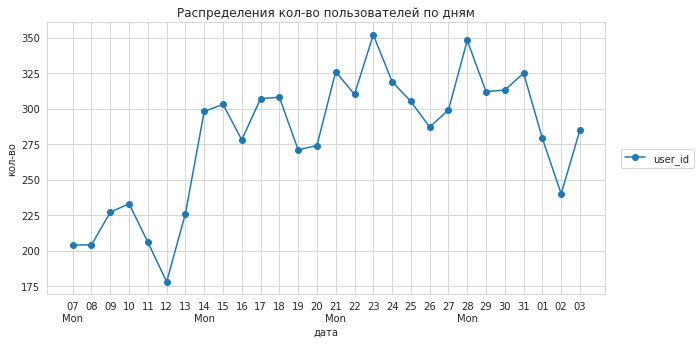

In [63]:
dt_users = (
    df.pivot_table(index='event_dt', values='user_id', aggfunc='nunique')
    .plot( 
        style='o-',  
        grid=True, 
        figsize=(10, 5), 
        title='Распределения кол-во пользователей по дням',
    )
)

dt_users.set_xlabel('дата')
dt_users.set_ylabel('кол-во')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5));#вынос легенды за пределы таблицы
mon_ticks(df['event_dt'].sort_values().unique())
plt.show()

Ежедневная аудитория растет с 200 до 280 с пиком 23 октября 350 пользователей

посмотрим как распределены пользователи по каналам:

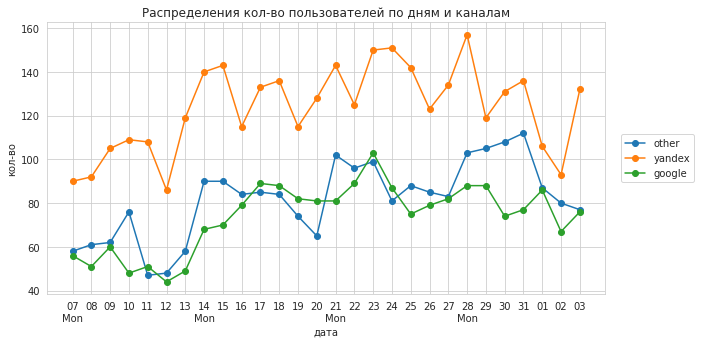

In [64]:
dt_users = (
    df.pivot_table(index='event_dt',columns='source', values='user_id', aggfunc='nunique')
    .plot( 
        y=list(df['source'].unique()), 
        style='o-',  
        grid=True, 
        figsize=(10, 5), 
        title='Распределения кол-во пользователей по дням и каналам',
    )
)

dt_users.set_xlabel('дата')
dt_users.set_ylabel('кол-во')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5));#вынос легенды за пределы таблицы
mon_ticks(df['event_dt'].sort_values().unique())
plt.show()

- Больше всего аудитория `yandex` 90-150 пользователей в день, с пиком 28 октября 155
- у `google` и `other` диапозон от 50-100 пользователей.

так же посмотрим как пользователи распределены по событиям

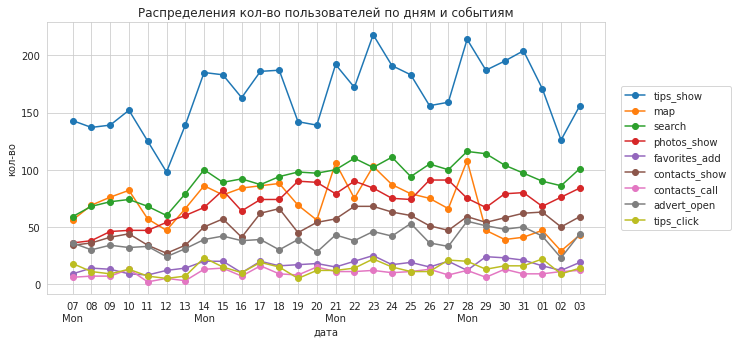

In [65]:
event_users = (
    df.pivot_table(index='event_dt',columns='event_name', values='user_id', aggfunc='nunique')
    .plot( 
        y=list(df['event_name'].unique()), 
        style='o-',  
        grid=True, 
        figsize=(10, 5), 
        title='Распределения кол-во пользователей по дням и событиям',
    )
)

event_users.set_xlabel('дата')
event_users.set_ylabel('кол-во')
plt.legend(loc='center left', bbox_to_anchor=(1.02, 0.5));#вынос легенды за пределы таблицы
mon_ticks(df['event_dt'].sort_values().unique())
plt.show()

- 100-200 пользователей в день смотрят подсказку.
- 40-120 пользуются поиском, смотрят фото и смотрят карту
- 40-60 просматривают объявления и смотрят контакты
- <20 добовляют в избранное, звонят и кликают на подсказку

В целом конверсия в целевое событие `contacts_show` растет на 3-4%(от 16,5% до 20,5%) по итогам 4 недель, скорее всго связано с ростом аудитории.
- общая конверсия по всем данным **23%**
- Больше всего аудитория `yandex` **90-150** пользователей в день, с конверсии 25%
- у `google`(24.5%) и `other`(18.5%) диапозон от **50-100** пользователей в день

<a name="4"></a>
# Сегментирование пользователей
[ссылка в содержание](#menu)

## Проведем сегментирование пользователей на группы

Сделаем сегментирования наших пользователей по времени их активности(на утренние, дневные, вечерние и ночные группы) это позволит нам посмотреть поведение пользователей в различное время суток и их вовлеченность. Позволит определить наиболее активную группу это поможет для принятия решения о развития приложения, маркетинге и поддержке.
Предпологая что наиболее активная и совершающая целевое действие у нас дневная группа, в дальнейшем это может дать понимания где можно улучшить приложение для наиболее активной части пользователей, а так же сделать предположения что можно сделать для других групп чтобы улучшить их показатели.

Сделаем копию выделим час события:

In [66]:
df_copy = df.copy()
df_copy['time'] = df_copy['event_time'].dt.strftime("%H").astype(int)
df_copy.head()

event_time event_name  \
805 2019-10-07 13:39:45.989359  tips_show   
806 2019-10-07 13:40:31.052909  tips_show   
809 2019-10-07 13:41:05.722489  tips_show   
820 2019-10-07 13:43:20.735461  tips_show   
830 2019-10-07 13:45:30.917502  tips_show   

                                  user_id    event_dt  week_number source  \
805  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
806  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
809  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
820  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
830  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   

     session_id  time  
805           1    13  
806           1    13  
809           1    13  
820           1    13  
830           1    13

Напишим функцию для сегментации:
- с **3** до **9** утро
- с **9** до **15** день
- с **15** до **21** вечер
- с **21** до **3** ночь

In [67]:
def time_segment(row):
    time_r = row['time']
    
    try:
        if 3 <= time_r < 9:
            return 'morning'
        if 9 <= time_r < 15:
            return 'afternoon'
        if 15 <= time_r < 21:
            return 'evening'
        if 24 <= time_r:
            display('Ошибка время больше 24 часов в time')
            return 'error'
        else:
            return 'night'
    except:
        display('Ошибка проверить тип данных в time') 
        
row_values = [4]
row_columns = ['time']

row = pd.Series(data=row_values, index=row_columns)

time_segment(row)

'morning'

Применим функцию:

In [68]:
df_copy['time_segment'] = df_copy.apply(time_segment, axis=1)
df_copy.head()

event_time event_name  \
805 2019-10-07 13:39:45.989359  tips_show   
806 2019-10-07 13:40:31.052909  tips_show   
809 2019-10-07 13:41:05.722489  tips_show   
820 2019-10-07 13:43:20.735461  tips_show   
830 2019-10-07 13:45:30.917502  tips_show   

                                  user_id    event_dt  week_number source  \
805  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
806  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
809  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
820  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   
830  0001b1d5-b74a-4cbf-aeb0-7df5947bf349  2019-10-07           41  other   

     session_id  time time_segment  
805           1    13    afternoon  
806           1    13    afternoon  
809           1    13    afternoon  
820           1    13    afternoon  
830           1    13    afternoon

Посмотрим на профили и в зависимости от предпочитаемого времени присвоим им категорию:

In [69]:
segment_users = (
    df_copy.groupby(['user_id','time_segment'])#группируем по ID и сегменту
    .agg({'event_dt':'count'})#считаем кол-во у пользователя в каждом сегменте
    .reset_index()
    .sort_values(['user_id','event_dt'], ascending=False)#сортируем от большего к меньшему
    .groupby('user_id').agg({'time_segment':'first'}).reset_index()#берем наибольшое предпочтение пользователя
)
segment_users.head()

user_id time_segment
0  0001b1d5-b74a-4cbf-aeb0-7df5947bf349      evening
1  00157779-810c-4498-9e05-a1e9e3cedf93        night
2  00463033-5717-4bf1-91b4-09183923b9df    afternoon
3  004690c3-5a84-4bb7-a8af-e0c8f8fca64e        night
4  00551e79-152e-4441-9cf7-565d7eb04090    afternoon

Посмотрим какое у нас распределение по сегментам:

In [70]:
segment_users['time_segment'].value_counts()

evening      1642
afternoon    1586
night         870
morning       195
Name: time_segment, dtype: int64

Меньше всего в категории `утро`, но не меньше 10% от самого большой категории `вечер`

присвоим категории по таблицам `df`, `profiles` и `session`

In [71]:
df = df.merge(segment_users, on='user_id', how='left')
session = session.merge(segment_users, on='user_id', how='left')
profiles = profiles.merge(segment_users, on='user_id', how='left')

<a name="5"></a>
# Ответы на основные вопросы
[ссылка в содержание](#menu)

## Пользователи какой группы склонны часто возвращаться в мобильное приложение

In [72]:
#создадим список с нашей сегментацией
list_time_segment = [
    'morning',
    'afternoon',
    'evening',
    'night'
]

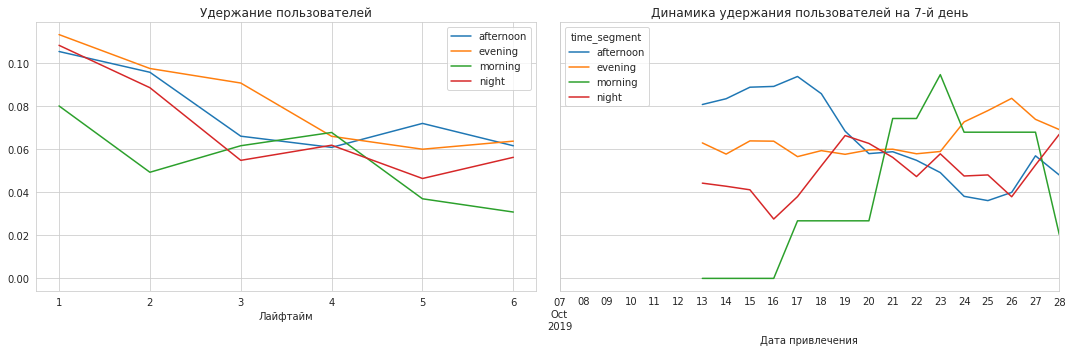

In [73]:
horizon_days = 7
observation_date = md['event_dt'].max()
dimensions = ['time_segment']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, session, observation_date, horizon_days, dimensions=dimensions
)
retention_grouped.head()

plot_retention(retention_grouped, retention_history, horizon_days) 

- Лучше всего удержание дневных, вечерних и ночные пользователей(11%-6%)
- утренние начинают с 8% и за 6 дней спускаются к 3%

Динамика на 7 день:
- дневные снижаются с 8% до 4%
- вечерние стабильны 6%, немного растут ближе к концу октября до 7%
- ночные в диапозоне с 4% до 6%
- утренние с 13 по 16 октября находится на 0% потом рост к 23 октября до 9% затем снижение до 2% 

## Пользователи какой группы часто делают целевое событие

In [74]:
conv_time_segment = df.pivot_table(index='time_segment', values='user_id', aggfunc='nunique').reset_index()
conv_time_segment = conv_time_segment.merge(
    df.query('event_name == "contacts_show"')
    .pivot_table(index='time_segment', values='user_id', aggfunc='nunique')
    .reset_index(),
    on='time_segment'
)
conv_time_segment.columns = ['time_segment','all_users','target_users']
conv_time_segment['ratio'] = round(conv_time_segment['target_users']/conv_time_segment['all_users'],3)
conv_time_segment

time_segment  all_users  target_users  ratio
0    afternoon       1586           390  0.246
1      evening       1642           414  0.252
2      morning        195            36  0.185
3        night        870           141  0.162

Чаще всего целевое событие делают пользователи дневной и вечерней группы 25%
- антилидер ночные у них 16%
- самая малочисленная группа(195) делает 18%

Посмотрим на график:

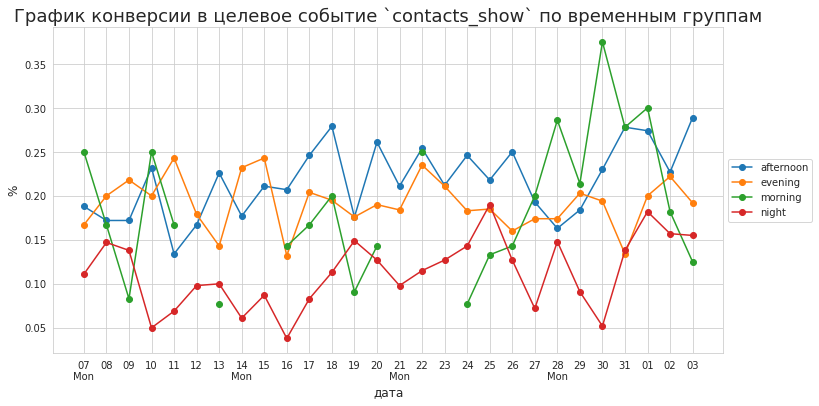

In [75]:
time_segment_conversion = conversion_event(df, 'event_dt', 'user_id', 'contacts_show', columns=['time_segment'])
time_segment_conversion['ratio'].plot(kind='line', figsize=(12,6),  style = 'o-', grid=True)

# формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График конверсии в целевое событие `contacts_show` по временным группам', size=18)
plt.xlabel('дата', size=12)
plt.ylabel('%', size=12)
ax.tick_params(labelsize=11)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
mon_ticks(df['event_dt'].sort_values().unique())
plt.show()

- дневная и вечернии группы показывают относительную стабильность 15-25%
- ночная группа колеблится в диапозоне 5-18% 
- утренняя из-за своей малочисленности очень рванная на графике, но у нее четкий рост перед Хэллоуином с 24 октября(7%) до 30 октября (38%)

## Поиск "проблемного места", на каком-то действии сессия часто завершается не доходя до целевого

Подготовим данные, добавим разницу между последовательными событиями.

In [76]:
df['diff'] = df['event_time'].diff().astype('timedelta64[m]') #разница между событиями
df.head(5)

event_time event_name                               user_id  \
0 2019-10-07 13:39:45.989359  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
1 2019-10-07 13:40:31.052909  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
2 2019-10-07 13:41:05.722489  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
3 2019-10-07 13:43:20.735461  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   
4 2019-10-07 13:45:30.917502  tips_show  0001b1d5-b74a-4cbf-aeb0-7df5947bf349   

     event_dt  week_number source  session_id time_segment  diff  
0  2019-10-07           41  other           1      evening   NaN  
1  2019-10-07           41  other           1      evening   0.0  
2  2019-10-07           41  other           1      evening   0.0  
3  2019-10-07           41  other           1      evening   2.0  
4  2019-10-07           41  other           1      evening   2.0

соберем все возможные пути пользователя до таймаут в 30 мин:

In [77]:
#создадим два пустых списка
line_funnel = []#путь который прошел пользователь
step = []#шаг который сделал пользователь
for i in range(1,df.shape[0]):#перебераем все события
    if df['user_id'][i] == df['user_id'][i-1]:#проверяем что пользователь один и тот же
        if df['event_name'][i] != df['event_name'][i-1] and df['diff'][i-1] < 30:#проверяем что событие не повторяется что таймаут 30 мин не превышен
                step.append(df['event_name'][i])#сохраняем шаг
        else:#сессия сменилась
            line_funnel.append(step)#добавляем путь
            step = []#обнуляем шаги
    else:#пользователь поменялся
        line_funnel.append(step)#добавляем путь
        step = []#обнуляем шаги
    
line_funnel = [value for value in line_funnel if value]#убираем пустые значения
len(line_funnel)#всего сессий

8907

всего 8907 сессий путей, посмотрим на них подробнее написав функцию:

In [78]:
def filter_event_steps(list_event, num, sign='='):
    all_sessions = len(list_event)

    if sign == '=':
        list_event = [list_event[i] for i in range(len(list_event)) if len(list_event[i])==num]
    if sign == '>':
        list_event = [list_event[i] for i in range(len(list_event)) if len(list_event[i])>num]
    if sign == '<':
        list_event = [list_event[i] for i in range(len(list_event)) if len(list_event[i])<num]
    list_event = pd.Series((' > '.join(v) for v in list_event))
    len_event = list_event.shape[0]

    list_event = list_event.value_counts().reset_index().head(20)
    list_event['ratio_all_session'] = round(list_event[0]/all_sessions*100,2)
    return list_event, len_event, all_sessions

Выведем все сессии с одним действием:

In [79]:
one_event_list = filter_event_steps(line_funnel, 1, sign='=')
print('Сессии с одним событием, всего:', one_event_list[1],',', round(one_event_list[1]/one_event_list[2]*100),'%')
one_event_list[0]

Сессии с одним событием, всего: 4428 , 50 %


index     0  ratio_all_session
0      tips_show  1677              18.83
1         search   799               8.97
2            map   522               5.86
3    photos_show   490               5.50
4  contacts_show   469               5.27
5    advert_open   275               3.09
6  favorites_add   124               1.39
7  contacts_call    39               0.44
8     tips_click    33               0.37

Половина сессий всего с одним событием (4428 из 8907)
- посмотрели справку 18%(1677) tips_show  
- поискали 9%(799) search  
- карта 6%(522) map  

Выведем все сессии с двумя действиями:

In [80]:
two_event_list = filter_event_steps(line_funnel, 2, sign='=')
print('Сессии с двумя событиями, всего:', two_event_list[1],',', round(two_event_list[1]/two_event_list[2]*100),'%')
two_event_list[0]

Сессии с двумя событиями, всего: 2451 , 28 %


index    0  ratio_all_session
0                 map > tips_show  471               5.29
1       contacts_show > tips_show  460               5.16
2          tips_click > tips_show  193               2.17
3         advert_open > tips_show  171               1.92
4       tips_show > contacts_show  117               1.31
5            search > photos_show  111               1.25
6     favorites_add > photos_show   74               0.83
7     contacts_show > photos_show   74               0.83
8         tips_show > advert_open   74               0.83
9       favorites_add > tips_show   73               0.82
10           photos_show > search   73               0.82
11             tips_show > search   61               0.68
12                tips_show > map   52               0.58
13                   map > search   40               0.45
14  contacts_show > contacts_call   36               0.40
15              map > advert_open   33               0.37
16         contacts_show > search   32               0.36
17  contacts_call > contacts_show   29               0.33
18            contacts_show > map   22               0.25
19         favorites_add > search   21               0.24

28% сессий с двумя событиями (2451 из 8907)
- карта и справка 5,2%(471) map > tips_show 
- контакты и справка 5,2%(460) contacts_show > tips_show
- справка и справка 2,2%(193) tips_click > tips_show

In [81]:
three_event_list = filter_event_steps(line_funnel, 3, sign='=')
print('Сессии с тремя событиями, всего:', three_event_list[1],',', round(three_event_list[1]/three_event_list[2]*100),'%')
three_event_list[0]

Сессии с тремя событиями, всего: 633 , 7 %


index   0  ratio_all_session
0             tips_show > advert_open > tips_show  48               0.54
1           tips_show > contacts_show > tips_show  44               0.49
2           advert_open > tips_show > advert_open  41               0.46
3       contacts_show > tips_show > contacts_show  35               0.39
4                     tips_show > map > tips_show  30               0.34
5     contacts_show > contacts_call > photos_show  27               0.30
6                   map > advert_open > tips_show  22               0.25
7              photos_show > search > photos_show  21               0.24
8              tips_show > tips_click > tips_show  19               0.21
9                   search > photos_show > search  18               0.20
10               advert_open > tips_show > search  16               0.18
11                          map > tips_show > map  16               0.18
12                  advert_open > tips_show > map  13               0.15
13          tips_show > favorites_add > tips_show  10               0.11
14                       map > search > tips_show  10               0.11
15               search > advert_open > tips_show  10               0.11
16  contacts_show > contacts_call > contacts_show   9               0.10
17      photos_show > favorites_add > photos_show   8               0.09
18                contacts_show > map > tips_show   8               0.09
19                       map > tips_show > search   8               0.09

7% сессий с тремя событиями (633 из 8907)
- справка > открытие объявления > справка 0,5% (48) `tips_show > advert_open > tips_show`
- справка > контакты > справка 0,5% (44) `tips_show > contacts_show > tips_show`
- открытие объявления > справка > открытие объявления 0,5% (41) `advert_open > tips_show > advert_open`

In [82]:
four_event_list = filter_event_steps(line_funnel, 4, sign='=')
print('Сессии с четырьмя событиями, всего:', four_event_list[1],',', round(four_event_list[1]/four_event_list[2]*100),'%')
four_event_list[0]

Сессии с четырьмя событиями, всего: 505 , 6 %


index   0  ratio_all_session
0   contacts_show > tips_show > contacts_show > ti...  83               0.93
1   advert_open > tips_show > advert_open > tips_show  67               0.75
2     tips_click > tips_show > tips_click > tips_show  48               0.54
3                   map > tips_show > map > tips_show  29               0.33
4   tips_show > advert_open > tips_show > advert_open  27               0.30
5   favorites_add > tips_show > favorites_add > ti...  15               0.17
6         map > advert_open > tips_show > advert_open   8               0.09
7         search > photos_show > search > photos_show   7               0.08
8   tips_show > contacts_show > tips_show > contac...   7               0.08
9        tips_show > advert_open > tips_show > search   6               0.07
10  favorites_add > tips_show > contacts_show > ti...   6               0.07
11             map > search > advert_open > tips_show   6               0.07
12  favorites_add > photos_show > favorites_add > ...   6               0.07
13  contacts_call > contacts_show > contacts_call ...   6               0.07
14                  tips_show > map > tips_show > map   5               0.06
15             map > advert_open > tips_show > search   5               0.06
16  tips_show > advert_open > tips_show > contacts...   4               0.04
17  tips_click > tips_show > contacts_show > tips_...   4               0.04
18          tips_show > advert_open > tips_show > map   4               0.04
19          map > tips_show > advert_open > tips_show   4               0.04

 6% сессий с тремя событиями (505 из 8907)
- контакты > справка > контакты > справка 1% (83) `contacts_show > tips_show > contacts_show > tips_show`
- открытие объявления > справка > открытие объявления > справка 0.7% (67) `advert_open > tips_show > advert_open > tips_show`
- клик по справке > справка > клик по справке > справка 0,5% (48) `tips_click > tips_show > tips_click > tips_show`

Ну и посмотримчем чаще всего заканчивается сессия:

In [83]:
last_event_session = [line_funnel[i][-1] for i in range(len(line_funnel))] 
last_event_session = pd.Series((v for v in last_event_session))

len_shape = last_event_session.shape[0]
print('Событие которым заканчивается сессия, всего:', len_shape)
last_event_session = last_event_session.value_counts().reset_index()
last_event_session['ratio_all_session'] = round(last_event_session[0]/len_shape *100,2)
last_event_session

Событие которым заканчивается сессия, всего: 8907


index     0  ratio_all_session
0      tips_show  4097              46.00
1         search  1247              14.00
2    photos_show   938              10.53
3  contacts_show   820               9.21
4            map   729               8.18
5    advert_open   721               8.09
6  favorites_add   208               2.34
7  contacts_call    95               1.07
8     tips_click    52               0.58

Топ 3:
- 46% (4097) `tips_show` окончание сессии справкой - из них 40% сессии с одним действием
- 14% (1247) `search` окончание сессии поиском - из них 64% сессии с одним действием
- 10% (938) `photos_show` окончание сессии справкой - из них 52% сессии с одним действием

Либо с приложением, либо с отчетностью что-то не так,

половина сессий это `показ справки` + сессии с одним событием (и то и другое 77% всех событий).

оставшиеся 23% сложно назвать последовательными действиями (все возможные комбинации с событием `справка`)

<a name="6"></a>
# Проверим гипотезы
[ссылка в содержание](#menu)

## Первая гипотеза

педварительно проверим чтобы пользователи между групп не пересекались:

In [84]:
list(set(df.query('source == "google"').user_id.unique()) & set(df.query('source == "yandex"').user_id.unique()))

[]

отлично,
установим значение alpha.

In [85]:
alpha = 0.05

 Сформулируем гипотезы: 
- **Нулевая**: различий по удержанию пользователей использующих Yandex и Google (retention rate) нет.
- **Альтернативная**: различий по удержанию пользователей использующих Yandex и Google (retention rate) есть.

In [86]:
dimensions = ['source']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, session, observation_date, horizon_days, dimensions=dimensions
)

df_rr_google = retention_grouped.drop(columns=['cohort_size', 0]).T['google']
df_rr_yandex = retention_grouped.drop(columns=['cohort_size', 0]).T['yandex']

t_test(df_rr_google,df_rr_yandex, alpha, 'google', 'yandex', '`retention rate` google и yandex равны')

p-значение: 0.9728926427969418
Не получилось отвергнуть нулевую гипотезу, что `retention rate` google и yandex равны

cреднее по google:  0.074
cреднее по yandex:  0.075


## Вторая гипотеза

Подготовим данные к проверке:

In [87]:
df_conv_source = unique_user_source.drop(columns='ratio').T
df_conv_source

source        google  other  yandex
user_id         1129   1230    1934
target_event     275    228     478

Для проверки используем нашу функцию z-тест для пропорций, сформулируем гипотезы: 
- **Нулевая**: различия по конверсии (в целевое событие `contacts_show`) у пользователей использующих Yandex и Google нет.
- **Альтернативная**: различия по конверсии (в целевое событие `contacts_show`) у пользователей использующих Yandex и Google есть.

In [88]:
cicle_event(df_conv_source, 'google', 'yandex' ,alpha)

google & yandex target_event
p-значение:  0.8244316027993777
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными



## Третья гипотеза

проверим чтобы пользователи между групп не пересекались:

In [89]:
#пересечение дневных и не дневных пользователей
list(set(df.query('source == "afternoon"').user_id.unique()) & set(df.query('source != "afternoon"').user_id.unique()))

[]

In [90]:
#пересечение вечерних и не вечерних пользователей
list(set(df.query('source == "evening"').user_id.unique()) & set(df.query('source != "evening"').user_id.unique()))

[]

хорошо переходим к гипотезам

 Сформулируем гипотезы: 
- **Нулевая**: различия по удержанию пользователей использующих приложение вечером и в другое время суток нет.
- **Альтернативная**: различия по удержанию пользователей использующих приложение вечером и в другое время суток есть.

In [91]:
dimensions = ['time_segment']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, session, observation_date, horizon_days, dimensions=dimensions
)

df_rr_afternoon = retention_grouped.drop(columns=['cohort_size', 0]).T['afternoon']

retention_raw, retention_grouped, retention_history = get_retention(
    profiles.query('time_segment != "afternoon"'), session.query('time_segment != "afternoon"'), observation_date, horizon_days
)
df_rr_not_afternoon = retention_grouped.drop(columns=['cohort_size', 0]).T['user_id']

t_test(df_rr_afternoon,df_rr_not_afternoon, alpha, 'дневные', 'не дневные', '`retention rate` дневные и не дневные равны')

p-значение: 0.9252066601785309
Не получилось отвергнуть нулевую гипотезу, что `retention rate` дневные и не дневные равны

cреднее по дневные:  0.077
cреднее по не дневные:  0.076


## Четвертая гипотеза

подготовим данные конверсии

In [92]:
conv_time_segm = conv_time_segment.drop(columns='ratio').set_index('time_segment').T
conv_time_segm['no_afternoon'] = conv_time_segm.drop(columns='afternoon').sum(axis=1)
conv_time_segm['no_evening'] = conv_time_segm.drop(columns='evening').sum(axis=1)
conv_time_segm 

time_segment  afternoon  evening  morning  night  no_afternoon  no_evening
all_users          1586     1642      195    870          2707        5358
target_users        390      414       36    141           591        1158

 Сформулируем гипотезы: 
- **Нулевая**: различия по конверсии у пользователей использующих приложение днем и в другое время суток нет.
- **Альтернативная**: различия по конверсии у пользователей использующих приложение днем и в другое время суток есть.

In [93]:
cicle_event(conv_time_segm, 'afternoon', 'no_afternoon' ,alpha)

afternoon & no_afternoon target_users
p-значение:  0.0377861409651532
Отвергаем нулевую гипотезу: между долями есть значимая разница



## Пятая гипотеза

 Сформулируем гипотезы: 
- **Нулевая**: различия по конверсии у пользователей использующих приложение вечером и в другое время суток нет.
- **Альтернативная**: различия по конверсии у пользователей использующих приложение вечером и в другое время суток есть.

In [94]:
cicle_event(conv_time_segm, 'evening', 'no_evening' ,alpha)

evening & no_evening target_users
p-значение:  0.002221414209744532
Отвергаем нулевую гипотезу: между долями есть значимая разница



Выводы по гипотезам:

 1. p-значение: **0.97** *Не получилось* отвергнуть нулевую гипотезу, считаем что **различий по удержанию** пользователей использующих **Yandex** и **Google** (retention rate) **нет.**
 2. p-значение:  **0.82** *Не получилось* отвергнуть нулевую гипотезу, считаем что **конверсия в целевое событие** у **google** и **yandex** **равна**
 3. p-значение:  **0.925** *Не получилось* отвергнуть нулевую гипотезу, считаем что **различий по удержанию** пользователей днем и в другое время суток **нет.**
 4. p-значение:  **0.037** ****Отвергаем*** нулевую гипотезу, переходим к альтернативной - **различия** по конверсии у пользователей использующих приложение **днем и в другое время суток** **есть.**
 5. p-значение:  **0.002** ***Отвергаем*** нулевую гипотезу, переходим к альтернативной - **различия** по конверсии у пользователей использующих приложение **вечером и в другое время суток** **есть.**

<a name="7"></a>
# Вывод

 ссылки на разделы:
 1. **[Обзор данных](#1)**
 2. **[Предобработка данных](#2)**
 3. **[Исследовательский анализ данные](#3)**
 4. **[Сегментирование пользователей](#4)**
 5. **[Ответы на основные вопросы](#5)**
 6. **[Проверим гипотезы](#6)**

В начале выводов хотелось бы обозначить некоторые вопросы которые могли бы дать более развернутое исследование:
- если мы исследуем приложение странно что в данных не было тип устройтства, а только браузер как будто это просто веб-сайт?
- пронумерованный поиск в отчете, какие действие они скрывают?

Так же обозначим проблемные места в данных:
- срез в 4 недели не очень продолжительный, чтобы можно было делать более полные выводы.
- на данные частично может оказывать влияние сезонность (переод праздника Хэллуоин)
- не понятное формирование показа справки(54% от всех данных) и это с учетом что кликов по подсказке всего 1%.
- 33% первых событий у пользователей это показ подсказки `tips_show`, трудно сказать первый ли это запуск у самих пользователей или приложение запускается с экрана подсказки. Или возможно что пользователям приходится постоянно обращатся к справке так как интуитивно не понятно где и что находится в приложении.

В связи с проведенным исследованием можно сделать такие выводы:
- в целом ежедневная аудитория растет с 200 до 280 с пиком 23 октября 350 пользователей
   - по каналам, аудитория `yandex` 90-150 пользователей в день, с пиком 28 октября 155
   - у `google` и `other` диапозон от 50-100 пользователей.
- общая продолжительность проведенного времени пользователей тоже находиться в росте
    - а вот среднее время сессии не однозначно, но уменьшается с 7 мин. до 0 мин. (с 7 октября по 2 ноября)
    - 3 ноября скачек до 8 мин. среднее время сессии (из за границы среза мы не можем сделать четкий вывод)
- Удержание за 7 дней плавно спускается с 11% до 6%. удержание на 7 день стабильно около 6%.
- конверсия в целевое событие за 4 недели(общая 23%) есть положительный тренд(рост в 3-4%) от 16,5% до 20,5%
    - по каналам, в среднем везде не большой рост от 12-16% до 15-22% с пиками до 31%
- пользователи дневной и вечерней групп склонны чаще возвращаться в мобильное приложение.
    - динамика у дневных немного снижается, вечерние показывают слабый рост кофициента удержания.
- чаще всего целевое событие делают пользователи дневной и вечерней группы 25%
    - антилидер ночные у них 16%, самая малочисленная группа(195) делает 18%
- проблемы это то что половина сессий это показ справки + сессии с одним событием (и то и другое 77% всех событий).
    - оставшиеся 23% сложно назвать последовательными действиями (все возможные комбинации с событием справка)
- ответы на наши предположения:
    - различий по удержанию пользователей использующих Yandex и Google нет.
    - конверсия в целевое событие у Yandex и Google равны
    - различий по удержанию пользователей пользующих днем и в другое время суток нет.
    - различие конверсии в целевое событие у пользователей использующих приложение **днем и в другое время суток** **есть.**
    - различие конверсии в целевое событие у пользователей использующих приложение **вечером и в другое время суток** **есть.**
    
Рекомендация.
- разобраться с отчетность(показ справки это проблема отчета или плохое юзабилити приложения).
- возможно усилить рекламу на праздники типа Хэллоуина, когда многие думают приобрести какую нибудь тематическую вещь.
- нужен тестировщик в команду разработчиков.